<a href="https://colab.research.google.com/github/Ramayee16/Rag_model/blob/main/ML(project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ========================================
# Step 0: Install dependencies (run once)
# ========================================
!pip install -q pypdf sentence-transformers faiss-cpu transformers accelerate fastapi uvicorn nest-asyncio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.5/323.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 54.3 MB/s eta 0:00:00


In [ ]:
# Step 1: Import Libraries
#basic lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [ ]:
# Step 2: Load HR Dataset
# Load CSV dataset
df = pd.read_csv("HR_comma_sep.csv")

# Check first rows
print(df.head())

# Basic info
print(df.info())
print(df.describe())


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

In [ ]:
# Step 3: Data Cleaning
# Check for missing values
print(df.isnull().sum())

# Drop duplicates if any
df = df.drop_duplicates()

# Optional: fill missing values
df.fillna(0, inplace=True)


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


/tmp/ipython-input-521752539.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Department', data=df, palette='viridis')


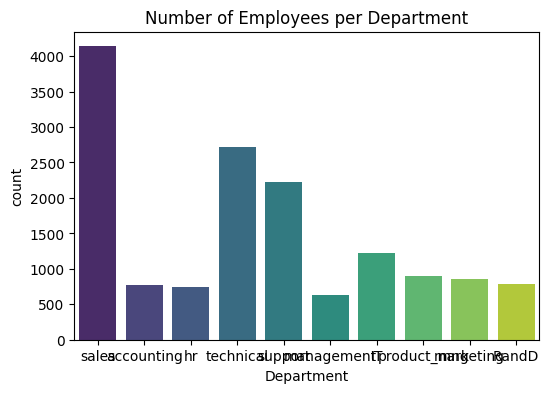

In [ ]:
# Step 4: Exploratory Data Analysis (EDA)
# Distribution of employees by department
plt.figure(figsize=(6,4))
sns.countplot(x='Department', data=df, palette='viridis')
plt.title("Number of Employees per Department")
plt.show()


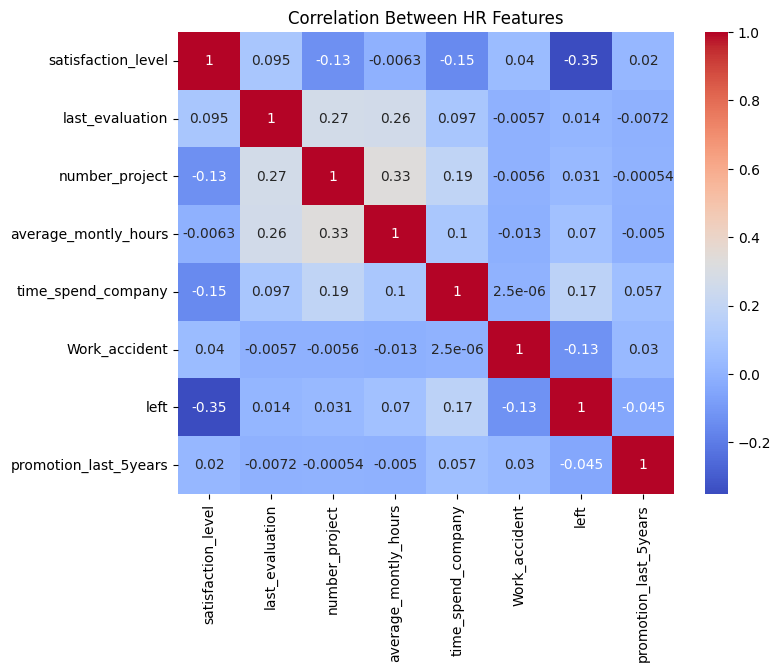

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,6))
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between HR Features")
plt.show()

/tmp/ipython-input-3023413450.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='left', data=df, palette='magma')


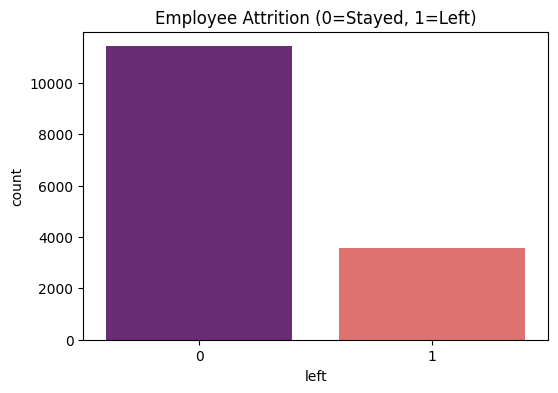

In [ ]:
# Attrition analysis
plt.figure(figsize=(6,4))
sns.countplot(x='left', data=df, palette='magma')
plt.title("Employee Attrition (0=Stayed, 1=Left)")
plt.show()


In [ ]:
# Step 5: Feature Encoding
# Convert categorical columns to numeric
# Example: Department encoding
df_encoded = pd.get_dummies(df, columns=['Department', 'salary'], drop_first=True)
print(df_encoded.head())


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

   Department_RandD  Department_accounting  Department_hr  \
0             False                  False 

In [ ]:
# Step 6: Train ML Model (Attrition Prediction)
# Define features and target
X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features (optional but helps)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model(Logistic Regression Model)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8324301792413505

Confusion Matrix:
 [[1925   73]
 [ 329   72]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.91      1998
           1       0.50      0.18      0.26       401

    accuracy                           0.83      2399
   macro avg       0.68      0.57      0.58      2399
weighted avg       0.79      0.83      0.80      2399



/tmp/ipython-input-4188778893.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')


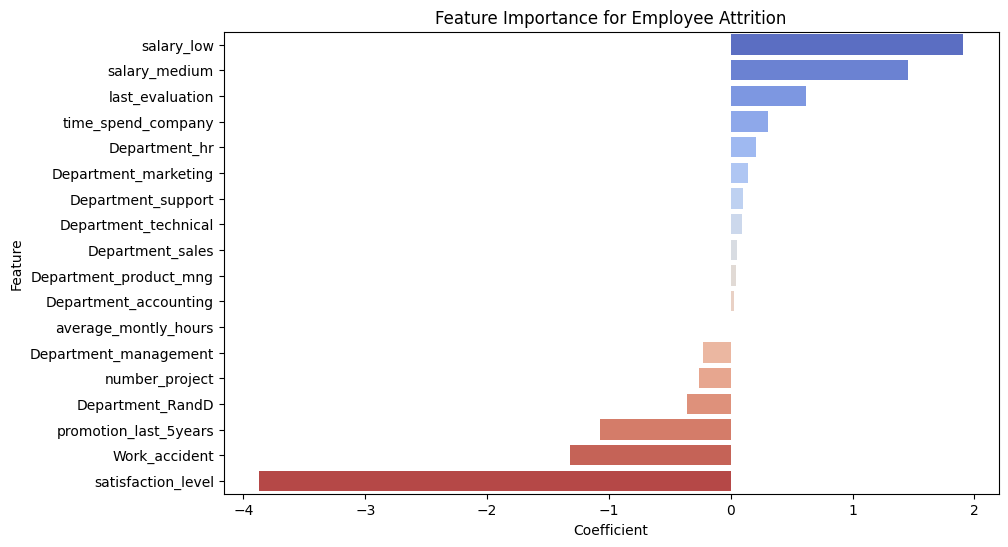

In [ ]:
# Step 7: Feature Importance Visualization
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')
plt.title("Feature Importance for Employee Attrition")
plt.show()


/tmp/ipython-input-3354497194.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=df_encoded, palette='Set2')


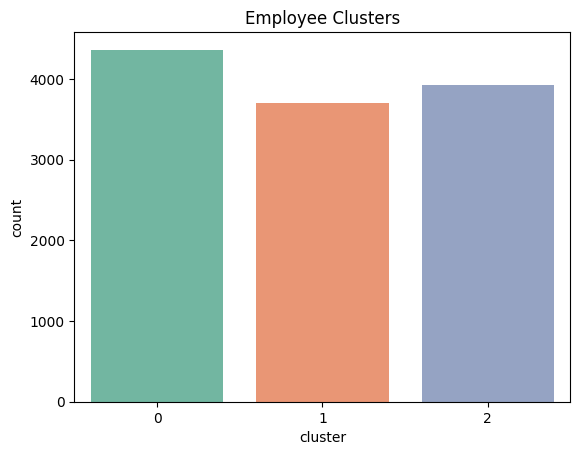

In [ ]:

# ========================================
# Step 8: Optional – Employee Clustering
# ========================================
# Use KMeans to cluster employees based on numeric features
kmeans = KMeans(n_clusters=3, random_state=42)
df_encoded['cluster'] = kmeans.fit_predict(X)
sns.countplot(x='cluster', data=df_encoded, palette='Set2')
plt.title("Employee Clusters")
plt.show()


In [ ]:
# ========================================
# Step 9: Save Processed Dataset
# ========================================
df_encoded.to_csv("hr_processed.csv", index=False)
print("Processed HR dataset saved to hr_processed.csv")


Processed HR dataset saved to hr_processed.csv


Step-by-Step: HR ML Backend with FastAPI

In [ ]:
#Step 1: Import Libraries
import pandas as pd
import numpy as np
from fastapi import FastAPI
from pydantic import BaseModel
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [ ]:
#Step 2: Load Processed Dataset & Model
# Load processed dataset
df = pd.read_csv("hr_processed.csv")

# Features and target
X = df.drop(['left', 'cluster'], axis=1, errors='ignore')
y = df['left']

# Scale features (using the same scaler from training)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model (if not loaded from file)
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)

# Optional: Save model & scaler for reuse
joblib.dump(model, "hr_model.pkl")
joblib.dump(scaler, "hr_scaler.pkl")


['hr_scaler.pkl']

In [ ]:
#Step 3: Define API Input Schema
class EmployeeFeatures(BaseModel):
    satisfaction_level: float
    last_evaluation: float
    number_project: int
    average_montly_hours: int
    time_spend_company: int
    Work_accident: int
    promotion_last_5years: int
    # Add encoded columns for department and salary if needed
    # e.g., sales: int, technical: int, low: int, medium: int, high: int


In [ ]:
#Step 4: Initialize FastAPI App
app = FastAPI(title="HR Employee Attrition API", version="1.0")


In [ ]:
#Step 5: API Endpoint – Predict Attrition
@app.post("/predict_attrition")
def predict_attrition(features: EmployeeFeatures):
    # Convert input to DataFrame
    input_df = pd.DataFrame([features.dict()])

    # Scale numeric features
    input_scaled = scaler.transform(input_df)

    # Predict
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]  # Probability of leaving

    result = {
        "attrition_prediction": int(prediction),
        "probability_of_leaving": float(probability)
    }
    return result


In [ ]:
#Step 6: API Endpoint – Get Employee Cluster Info
@app.get("/employee_clusters")
def get_clusters():
    if 'cluster' in df.columns:
        cluster_counts = df['cluster'].value_counts().to_dict()
        return {"employee_clusters": cluster_counts}
    else:
        return {"message": "Cluster data not available"}


In [ ]:
#Step 7: API Endpoint – Dataset Summary
@app.get("/dataset_summary")
def dataset_summary():
    summary = {
        "total_employees": int(df.shape[0]),
        "departments": df.filter(like='Department').columns.tolist(),
        "salary_levels": df.filter(like='salary').columns.tolist(),
        "attrition_counts": df['left'].value_counts().to_dict()
    }
    return summary


In [ ]:
!pip install -q pyngrok

In [ ]:
# Install the requests library if you haven't already
!pip install requests

In [ ]:
import requests

# Replace with your actual ngrok public URL obtained from the previous cell output
# Make sure your FastAPI app is running before executing this cell
ngrok_url = "YOUR_NGROK_URL"  # <--- PASTE YOUR NGROK URL HERE

# Define the data for the prediction
employee_data = {
  "satisfaction_level": 0.7,
  "last_evaluation": 0.8,
  "number_project": 3,
  "average_montly_hours": 150,
  "time_spend_company": 3,
  "Work_accident": 0,
  "promotion_last_5years": 0,
    # Include other encoded features from df_encoded if needed for the model
    # e.g., "Department_sales": 1, "salary_low": 0, etc.
    # You can get a list of expected features from the 'X.columns' output in Step 6
}


# Make the POST request to the predict_attrition endpoint
try:
    response = requests.post(f"{ngrok_url}/predict_attrition", json=employee_data)
    response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)

    # Print the JSON response
    print(response.json())

except requests.exceptions.RequestException as e:
    print(f"Error making the request: {e}")
    print("Please ensure your ngrok tunnel is active and the FastAPI app is running.")

Error making the request: Invalid URL 'YOUR_NGROK_URL/predict_attrition': No scheme supplied. Perhaps you meant https://YOUR_NGROK_URL/predict_attrition?
Please ensure your ngrok tunnel is active and the FastAPI app is running.
